In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_sets_lqr = "/home/mostovea/6g-projects/InvertedPendulum/src/build/results/truncnormal_5_5/lqr-all-dn/"

data_sets_pid = "/home/mostovea/6g-projects/InvertedPendulum/src/build/results/truncnormal_5_5/pid-all-dn/"

data_sets_pid_angle = "/home/mostovea/6g-projects/InvertedPendulum/src/build/results/truncnormal_5_5/pid-angle-dn/"

data_sets_lqr_angle = "/home/mostovea/6g-projects/InvertedPendulum/src/build/results/truncnormal_5_5/lqr-angle-dn/"


In [3]:
def stable_time(df_delay, threshold=0.00872665, window_duration=5.0):
    t = df_delay['t'].values
    angle = np.abs(df_delay['phi'].values)
    is_stable = angle < threshold
    n = len(t)
    start_idx = 0
    end_idx = 0

    while start_idx < n:
        while end_idx < n and t[end_idx] - t[start_idx] < window_duration:
            end_idx += 1
        
        if end_idx == n:
            break

        if is_stable[start_idx:end_idx].all():
            return t[start_idx]

        start_idx += 1

    return float("inf")

In [4]:
def median(data_sets, t):
    phi_medians = []
    phi_mse = []
    for filename in os.listdir(data_sets):
        if filename.endswith(".csv"):
            filepath = os.path.join(data_sets, filename)
            df = pd.read_csv(filepath, names= ['t', 'position', 'vx', 'phi', 'omega'], header=None, skiprows=1)
            df = df[df["t"] <= t]
            if "phi" in df.columns:
                
                df["phi_deg"] = np.degrees(df["phi"])
                print(filename)
                print("Maximaler phi_deg-Wert:", df["phi_deg"].max())
                print(f"Stabilization time: {stable_time(df):.6f}")
                median_phi = df["phi_deg"].median()
                phi_mse.append((df["phi_deg"]**2).mean())
                phi_medians.append(median_phi)
    phi_medians_sorted = np.sort(phi_medians)

    # 99% Confidence interval
    confidence_level = 0.99
    n = len(phi_medians_sorted )
    
    z = 1.288  # z-value for  99 % CI
    lower_idx = max(0, int(np.floor(0.5 * n - z * np.sqrt(n))))
    upper_idx = min(n - 1, int(np.ceil(0.5 * n + z * np.sqrt(n))))
    
    ci_lower = phi_medians_sorted[lower_idx]
    ci_upper = phi_medians_sorted[upper_idx]
    median = np.median(phi_medians_sorted )
    df = pd.DataFrame(phi_medians_sorted, columns=["medians"])
    summary = df["medians"].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])
    print(summary)
    print(f"99% Confidence Interval for Median phy: [{ci_lower:.6f}, {ci_upper:.6f}]")
    
    return phi_medians_sorted, phi_mse

In [5]:
t = 60

In [6]:
phi_medians_lqr, phi_mse_lqr = median(data_sets_lqr, t)

lqr-all-dn-12.csv
Maximaler phi_deg-Wert: 20.53486467326822
Stabilization time: 5.426300
lqr-all-dn-6.csv
Maximaler phi_deg-Wert: 20.601213185944367
Stabilization time: 5.425800
lqr-all-dn-29.csv
Maximaler phi_deg-Wert: 20.540594251219527
Stabilization time: 5.426100
lqr-all-dn-13.csv
Maximaler phi_deg-Wert: 20.522546080672907
Stabilization time: 5.426700
lqr-all-dn-18.csv
Maximaler phi_deg-Wert: 20.522431489113877
Stabilization time: 5.426500
lqr-all-dn-16.csv
Maximaler phi_deg-Wert: 20.59439498818231
Stabilization time: 5.425900
lqr-all-dn-7.csv
Maximaler phi_deg-Wert: 20.503180107197483
Stabilization time: 5.427000
lqr-all-dn-8.csv
Maximaler phi_deg-Wert: 20.50329469875651
Stabilization time: 5.426700
lqr-all-dn-23.csv
Maximaler phi_deg-Wert: 20.5045552059058
Stabilization time: 5.426700
lqr-all-dn-19.csv
Maximaler phi_deg-Wert: 20.51337875595081
Stabilization time: 5.426900
lqr-all-dn-27.csv
Maximaler phi_deg-Wert: 20.483355767485957
Stabilization time: 5.427100
lqr-all-dn-0.csv
Ma

In [7]:
phi_medians_pid, phi_mse_pid = median(data_sets_pid, t)

pid-all-dn-28.csv
Maximaler phi_deg-Wert: 20.23973411299633
Stabilization time: 7.505300
pid-all-dn-27.csv
Maximaler phi_deg-Wert: 20.19366830626781
Stabilization time: 7.525900
pid-all-dn-3.csv
Maximaler phi_deg-Wert: 20.194585038740023
Stabilization time: 7.532600
pid-all-dn-7.csv
Maximaler phi_deg-Wert: 20.21079974434222
Stabilization time: 7.524800
pid-all-dn-13.csv
Maximaler phi_deg-Wert: 20.22002436484383
Stabilization time: 7.516500
pid-all-dn-4.csv
Maximaler phi_deg-Wert: 20.105776580494744
Stabilization time: 7.543500
pid-all-dn-15.csv
Maximaler phi_deg-Wert: 20.252511071827747
Stabilization time: 7.514100
pid-all-dn-24.csv
Maximaler phi_deg-Wert: 20.224321548307312
Stabilization time: 7.509500
pid-all-dn-2.csv
Maximaler phi_deg-Wert: 20.078446493667002
Stabilization time: 8.205400
pid-all-dn-25.csv
Maximaler phi_deg-Wert: 20.306369104570045
Stabilization time: 7.491300
pid-all-dn-9.csv
Maximaler phi_deg-Wert: 20.301327075972893
Stabilization time: 7.484900
pid-all-dn-18.csv
M

In [8]:
phi_medians_pid_angle, phi_mse_pid_angle = median(data_sets_pid_angle, t)

pid-angle-dn-17.csv
Maximaler phi_deg-Wert: 20.02968778530137
Stabilization time: 2.360300
pid-angle-dn-20.csv
Maximaler phi_deg-Wert: 20.11717844061785
Stabilization time: 4.934300
pid-angle-dn-29.csv
Maximaler phi_deg-Wert: 20.180490276979803
Stabilization time: 5.027400
pid-angle-dn-21.csv
Maximaler phi_deg-Wert: 20.160092979473145
Stabilization time: 4.975500
pid-angle-dn-5.csv
Maximaler phi_deg-Wert: 20.11219370780021
Stabilization time: 4.916500
pid-angle-dn-0.csv
Maximaler phi_deg-Wert: 20.16628092366056
Stabilization time: 4.974700
pid-angle-dn-1.csv
Maximaler phi_deg-Wert: 20.08343122648464
Stabilization time: 4.883900
pid-angle-dn-19.csv
Maximaler phi_deg-Wert: 20.12468418773406
Stabilization time: 4.923600
pid-angle-dn-27.csv
Maximaler phi_deg-Wert: 20.135283906943982
Stabilization time: 4.945700
pid-angle-dn-11.csv
Maximaler phi_deg-Wert: 20.02968778530137
Stabilization time: 2.363900
pid-angle-dn-14.csv
Maximaler phi_deg-Wert: 20.039141588921026
Stabilization time: 1.93290

In [9]:
phi_medians_lqr_angle, phi_mse_lqr_angle = median(data_sets_lqr_angle, t)

lqr-angle-dn-7.csv
Maximaler phi_deg-Wert: 20.046532744478217
Stabilization time: 2.566800
lqr-angle-dn-6.csv
Maximaler phi_deg-Wert: 20.11460013053976
Stabilization time: 2.624700
lqr-angle-dn-25.csv
Maximaler phi_deg-Wert: 20.07707139495869
Stabilization time: 2.601000
lqr-angle-dn-21.csv
Maximaler phi_deg-Wert: 20.055298998743716
Stabilization time: 2.571300
lqr-angle-dn-15.csv
Maximaler phi_deg-Wert: 20.05982536532525
Stabilization time: 2.585100
lqr-angle-dn-28.csv
Maximaler phi_deg-Wert: 20.05254880132709
Stabilization time: 2.565300
lqr-angle-dn-27.csv
Maximaler phi_deg-Wert: 20.046303561360165
Stabilization time: 2.564200
lqr-angle-dn-17.csv
Maximaler phi_deg-Wert: 20.036162208386347
Stabilization time: 2.549600
lqr-angle-dn-29.csv
Maximaler phi_deg-Wert: 20.06274745008042
Stabilization time: 2.568200
lqr-angle-dn-2.csv
Maximaler phi_deg-Wert: 20.01461899528943
Stabilization time: 2.528100
lqr-angle-dn-26.csv
Maximaler phi_deg-Wert: 20.016165981336282
Stabilization time: 2.5144

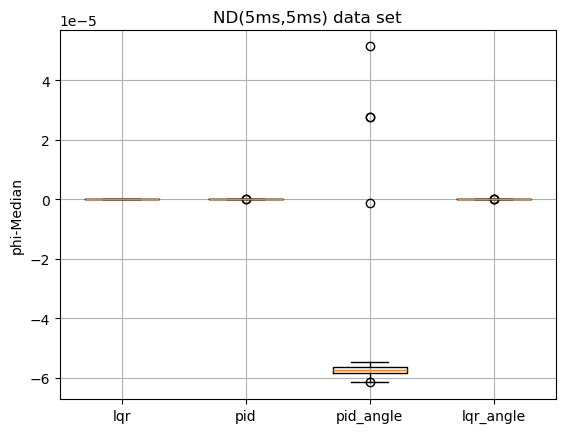

In [13]:
data = [phi_medians_lqr, phi_medians_pid, phi_medians_pid_angle, phi_medians_lqr_angle]

plt.boxplot(data, positions=[1, 2, 3,4,], widths=0.6)
plt.xticks([1, 2,3 ,4], ['lqr', 'pid', 'pid_angle', 'lqr_angle'])
plt.title("ND(5ms,5ms) data set")
plt.ylabel("phi-Median")
plt.grid(True)


plt.savefig('ND5_5_plotbox.png', dpi=300)
plt.show()

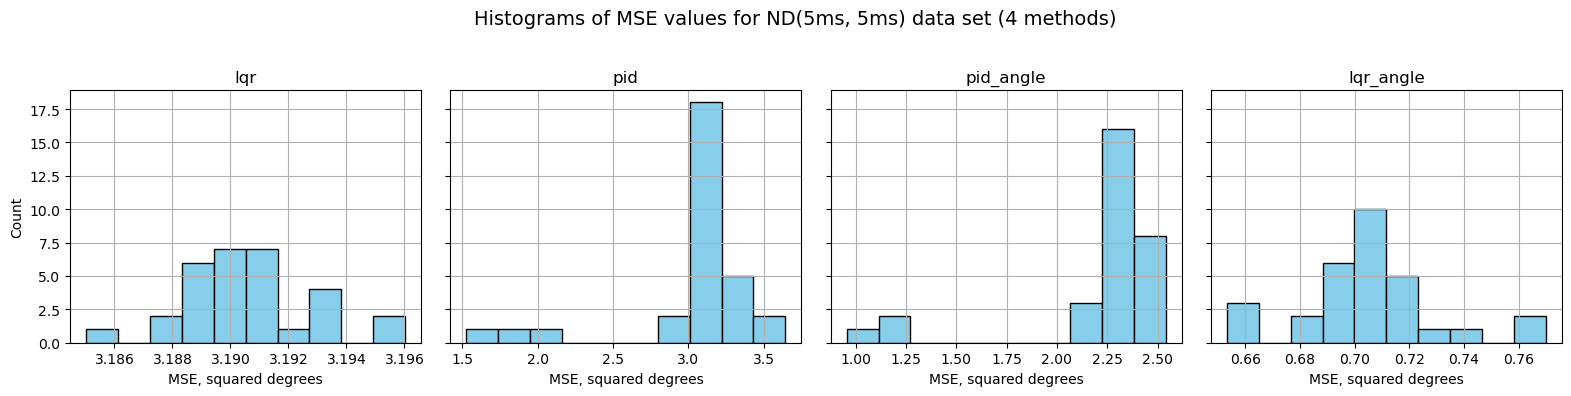

In [12]:
mse_dict = {
    'lqr': phi_mse_lqr,
    'pid': phi_mse_pid,
    'pid_angle': phi_mse_pid_angle,
    'lqr_angle': phi_mse_lqr_angle,
}

# Plot Setup
fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

for i, (label, data) in enumerate(mse_dict.items()):
    axs[i].hist(data, bins=10, color='skyblue', edgecolor='black')
    axs[i].set_title(label)
    axs[i].set_xlabel('MSE, squared degrees')
    axs[i].grid(True)

axs[0].set_ylabel('Count')
plt.suptitle('Histograms of MSE values for ND(5ms, 5ms) data set (4 methods)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig('ND5_5_mse_hist.png', dpi=300)
plt.show()